In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd

dataTrain = pd.read_csv('/content/priceVehicle.csv')

dataTrain.head()

,symboling,CarName,fueltype,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,price
0,3,alfa-romero giulia,gas,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,13495.0
1,3,alfa-romero stelvio,gas,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,16500.0
2,1,alfa-romero Quadrifoglio,gas,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,2.68,3.47,9.0,154,16500.0
3,2,audi 100 ls,gas,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,3.19,3.40,10.0,102,13950.0
4,2,audi 100ls,gas,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,3.19,3.40,8.0,115,17450.0


In [ ]:
type(dataTrain)  #data type

pandas.core.frame.DataFrame

In [ ]:
dataTrain.shape # check dimension

(205, 19)

In [ ]:
dataTrain.isnull().sum()

symboling           0
CarName             0
fueltype            0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
price               0
dtype: int64

In [ ]:
dataTest.isnull().sum()

symboling           0
CarName             0
fueltype            0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
price               0
dtype: int64

In [ ]:
dataTrain.shape # 15 rows removed

(205, 19)

In [ ]:
dataTest.isnull().sum()

symboling           0
CarName             0
fueltype            0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
price               0
dtype: int64

In [ ]:
dataTrain.dtypes  # checking the data type of every column

symboling             int64
CarName              object
fueltype             object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
price               float64
dtype: object

In [ ]:
dataTrain = dataTrain.dropna()


In [ ]:
dataTrain.isnull().sum()

symboling           0
CarName             0
fueltype            0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
price               0
dtype: int64

In [ ]:
dataTrain.shape # 15 rows removed

(205, 19)

In [ ]:
dataTrain.dtypes  # checking the data type of every column

symboling             int64
CarName              object
fueltype             object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
price               float64
dtype: object

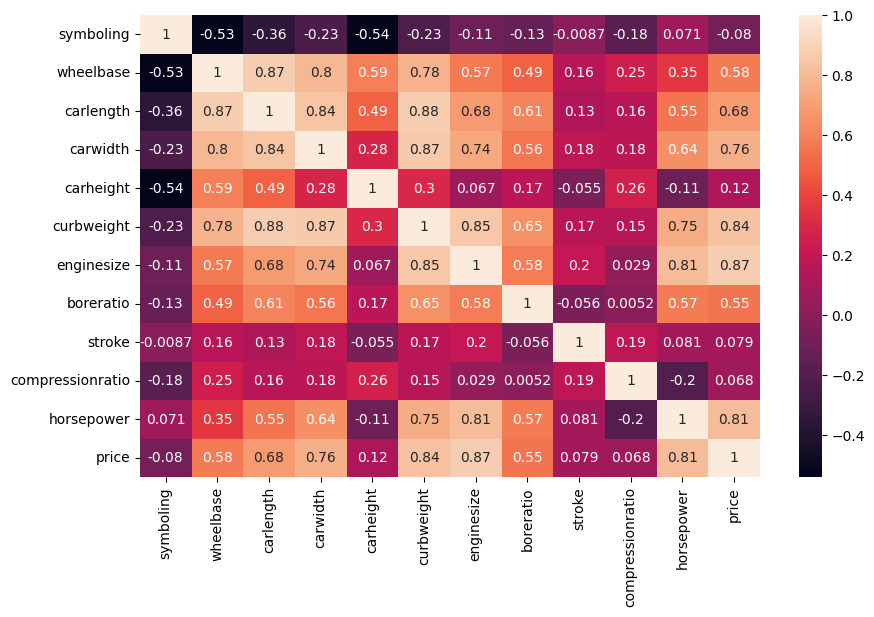

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
corr = dataTrain.corr(numeric_only=True)
##This is a pandas DataFrame method that is used to calculate the correlation between variables in the DataFrame.
sns.heatmap(corr,annot=True)
plt.show()

In [ ]:
 dataTrain.describe() #generate various summary statistics of a DataFrame
#Note: Only features with numeric data are considered

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,45400.000000


<Axes: xlabel='symboling', ylabel='price'>

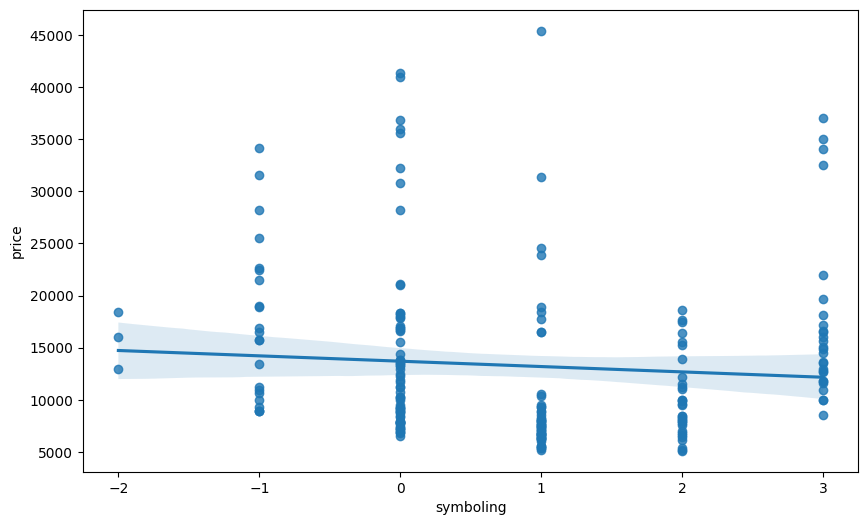

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.regplot(x="symboling", y="price", data=dataTrain)

In [ ]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataTrain['symboling'], dataTrain['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.07997822464270349  with a P-value of P = 0.2543117584863517


<Axes: xlabel='wheelbase', ylabel='price'>

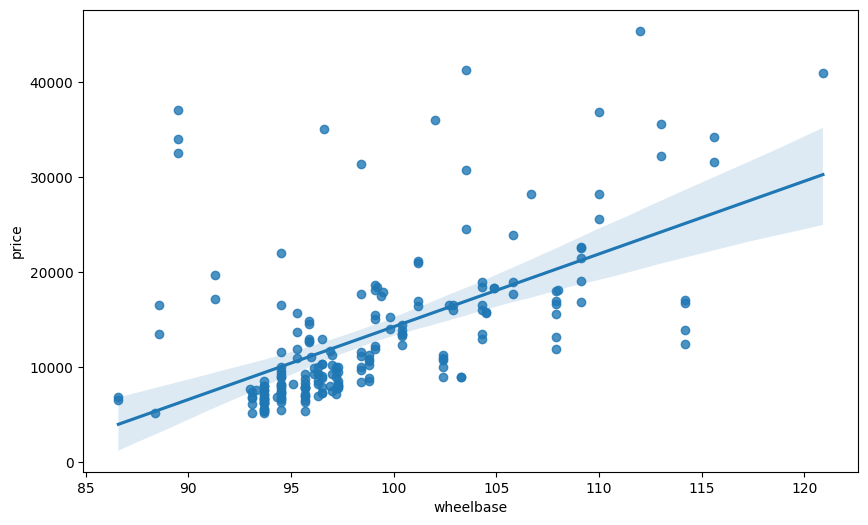

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x="wheelbase", y="price", data=dataTrain)

In [ ]:
pearson_coef, p_value = stats.pearsonr(dataTrain['wheelbase'], dataTrain['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.5778155982921501  with a P-value of P = 1.182820486337694e-19


<Axes: xlabel='carlength', ylabel='price'>

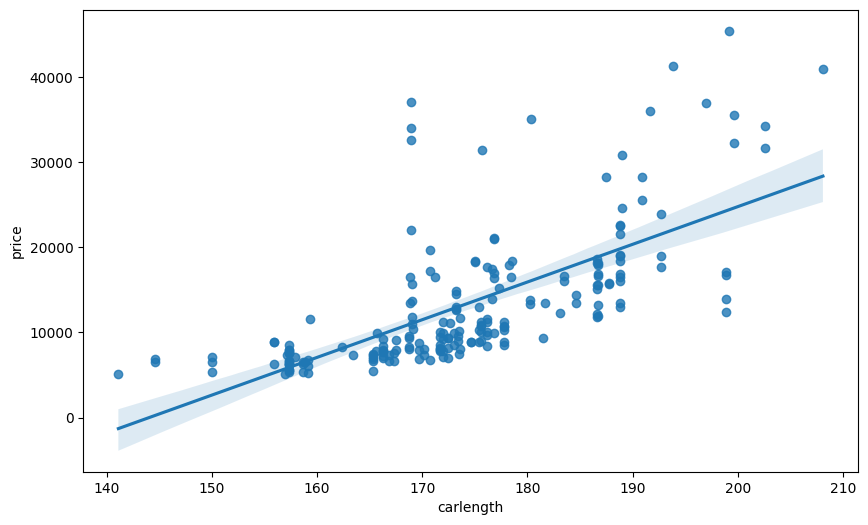

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x="carlength", y="price", data=dataTrain)

In [ ]:
pearson_coef, p_value = stats.pearsonr(dataTrain['carlength'], dataTrain['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.6829200156779621  with a P-value of P = 1.6787066240745445e-29


<Axes: xlabel='carwidth', ylabel='price'>

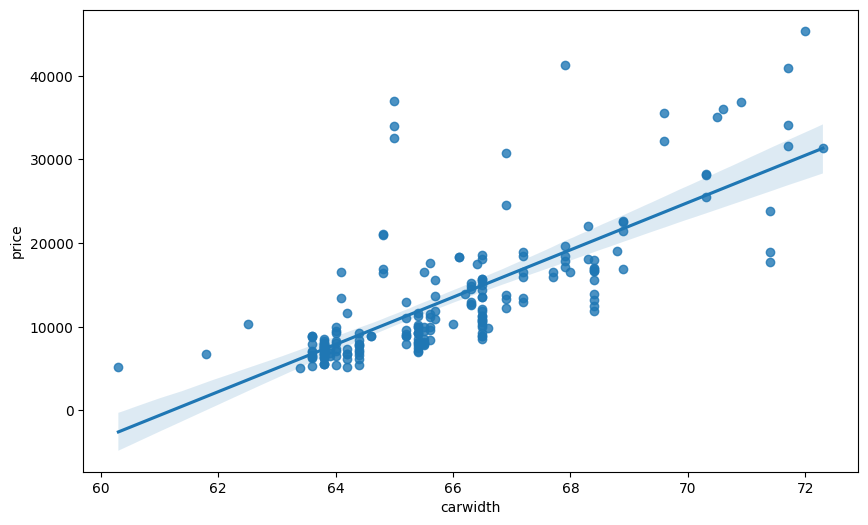

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x="carwidth", y="price", data=dataTrain)

In [ ]:
pearson_coef, p_value = stats.pearsonr(dataTrain['carwidth'], dataTrain['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.7593252997415115  with a P-value of P = 9.627437876118924e-40


<Axes: xlabel='carheight', ylabel='price'>

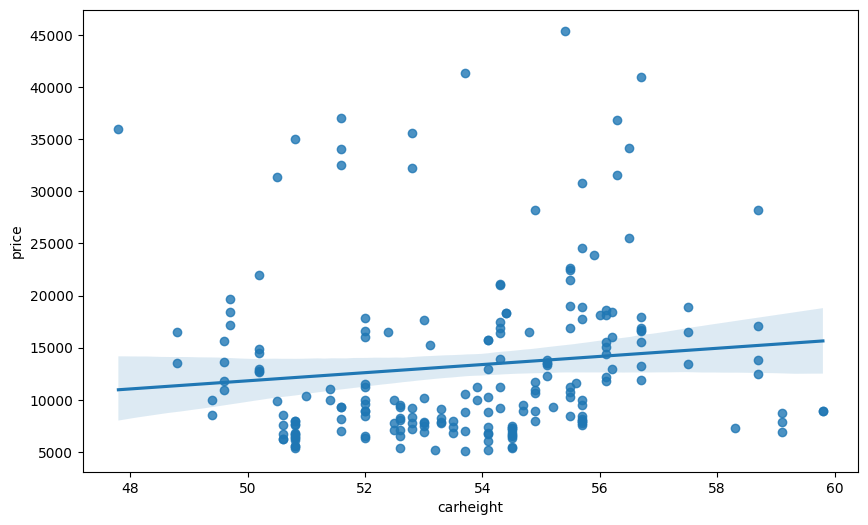

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x="carheight", y="price", data=dataTrain)

In [ ]:
pearson_coef, p_value = stats.pearsonr(dataTrain['carheight'], dataTrain['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.11933622657049445  with a P-value of P = 0.08832832352274969


<Axes: xlabel='curbweight', ylabel='price'>

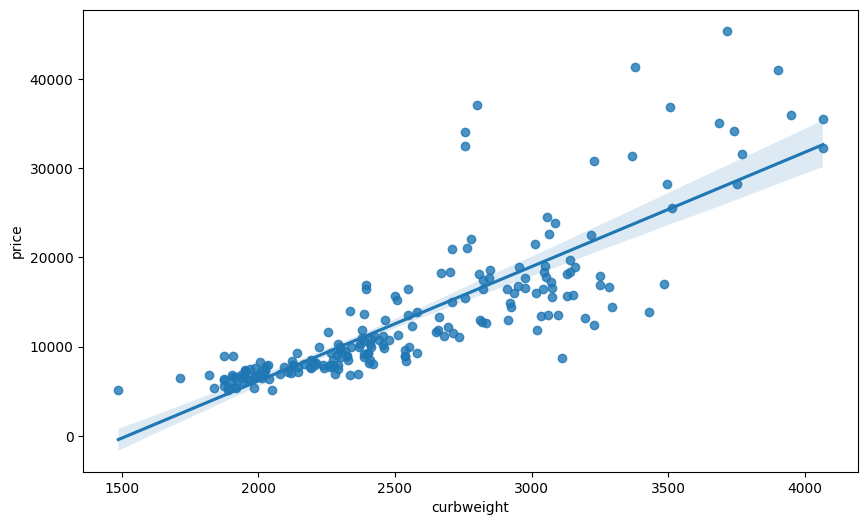

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x="curbweight", y="price", data=dataTrain)

In [ ]:
pearson_coef, p_value = stats.pearsonr(dataTrain['curbweight'], dataTrain['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.8353048793372968  with a P-value of P = 1.2144448264030345e-54


<Axes: xlabel='enginesize', ylabel='price'>

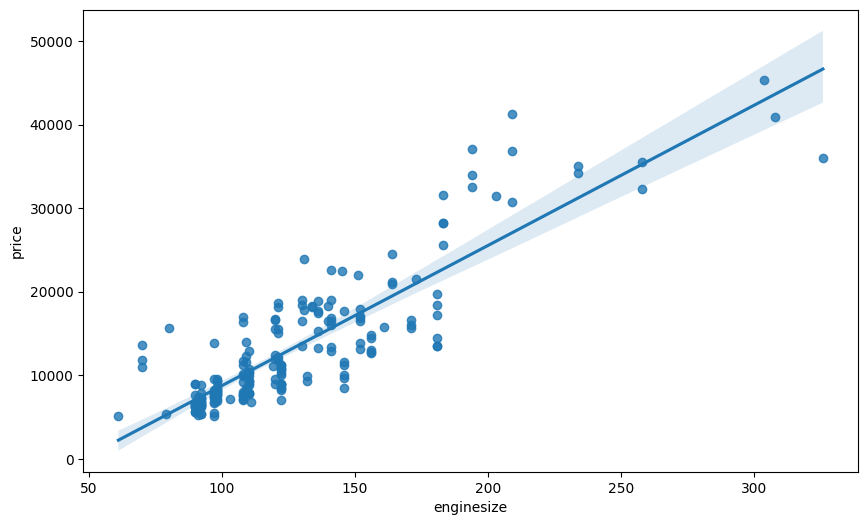

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x="enginesize", y="price", data=dataTrain)

In [ ]:
pearson_coef, p_value = stats.pearsonr(dataTrain['enginesize'], dataTrain['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.8741448025245117  with a P-value of P = 1.3547637598648963e-65


<Axes: xlabel='boreratio', ylabel='price'>

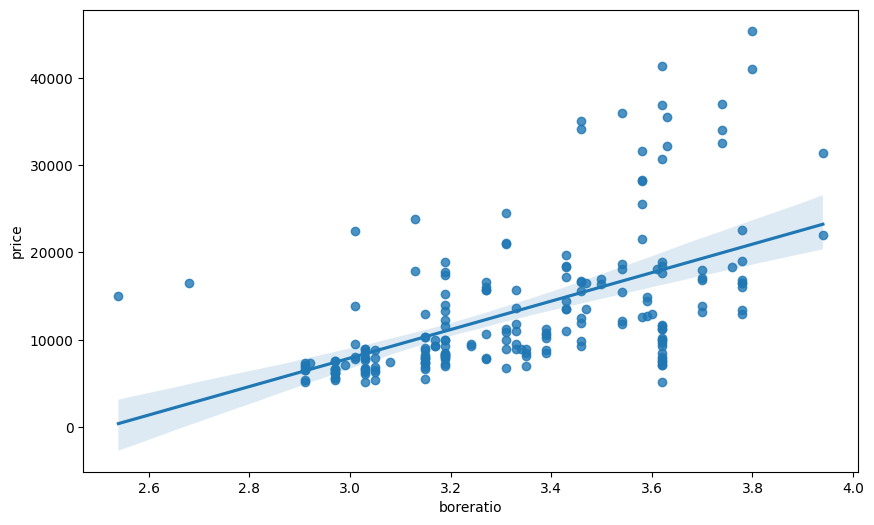

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x="boreratio", y="price", data=dataTrain)

In [ ]:
pearson_coef, p_value = stats.pearsonr(dataTrain['boreratio'], dataTrain['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.5531732367984437  with a P-value of P = 7.907922278248891e-18


<Axes: xlabel='stroke', ylabel='price'>

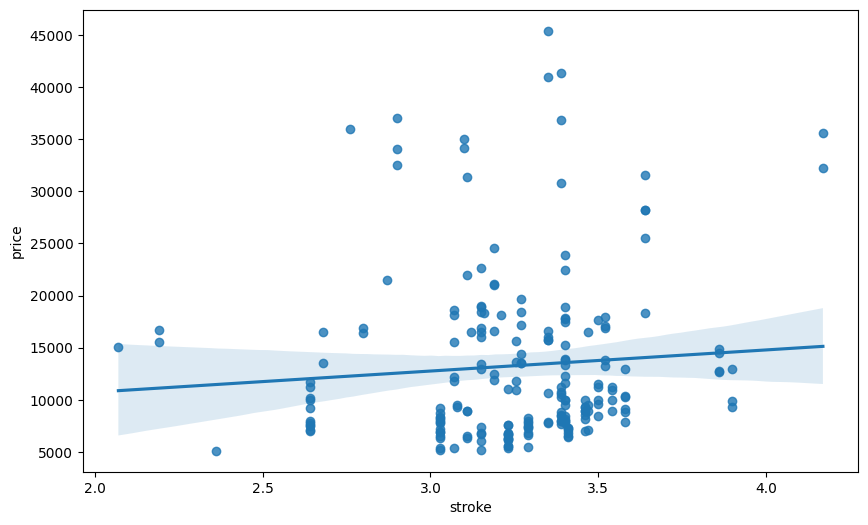

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x="stroke", y="price", data=dataTrain)

In [ ]:
pearson_coef, p_value = stats.pearsonr(dataTrain['stroke'], dataTrain['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.079443083881931  with a P-value of P = 0.2575137159090866


<Axes: xlabel='compressionratio', ylabel='price'>

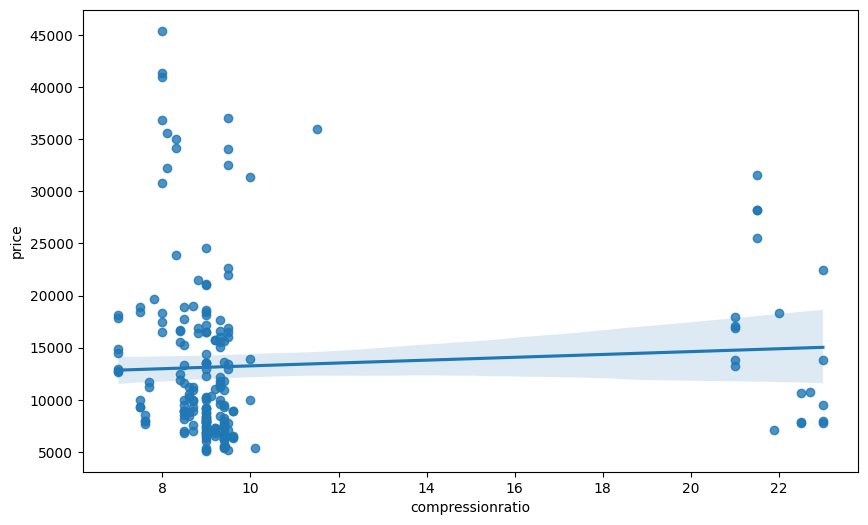

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x="compressionratio", y="price", data=dataTrain)

In [ ]:
pearson_coef, p_value = stats.pearsonr(dataTrain['compressionratio'], dataTrain['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.06798350579944264  with a P-value of P = 0.33277236122380593


<Axes: xlabel='horsepower', ylabel='price'>

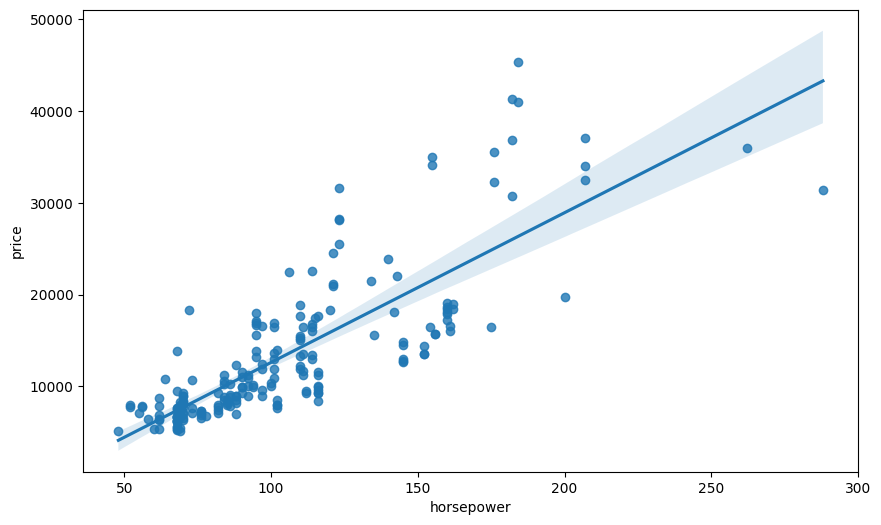

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x="horsepower", y="price", data=dataTrain)

In [ ]:
pearson_coef, p_value = stats.pearsonr(dataTrain['horsepower'], dataTrain['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.8081388225362216  with a P-value of P = 1.4834365732940885e-48


<Axes: xlabel='CarName', ylabel='price'>

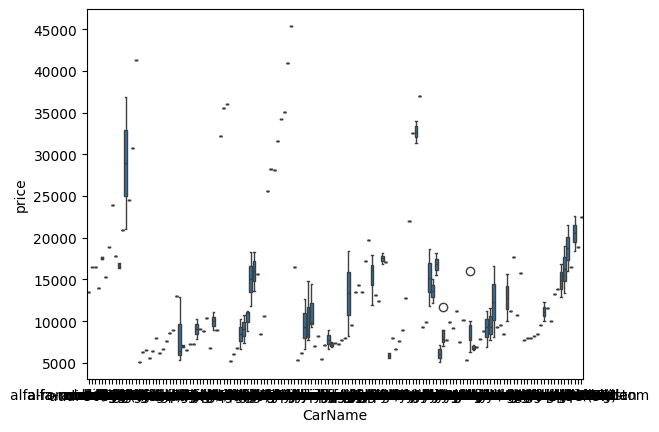

In [ ]:
sns.boxplot(x="CarName", y="price", data=dataTrain)

<Axes: xlabel='fueltype', ylabel='price'>

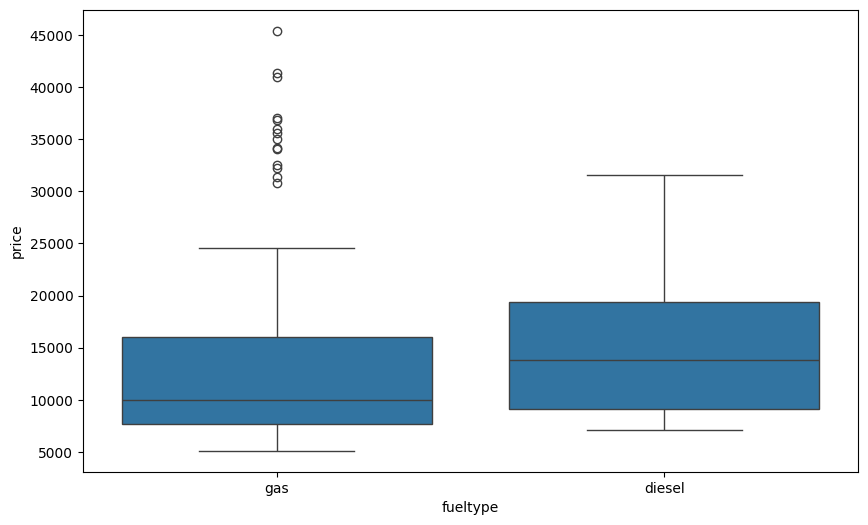

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="fueltype", y="price", data=dataTrain)

<Axes: xlabel='carbody', ylabel='price'>

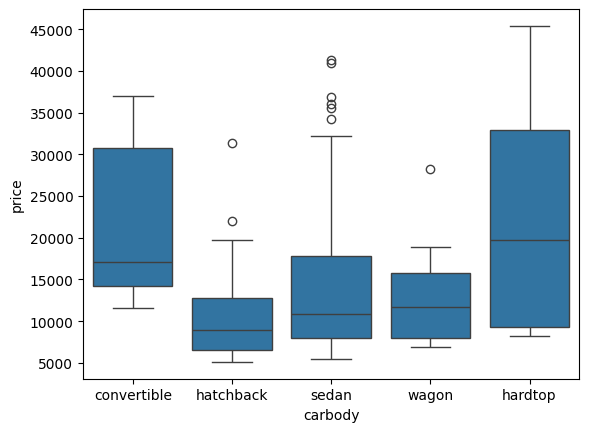

In [ ]:
sns.boxplot(x="carbody", y="price", data=dataTrain)

<Axes: xlabel='drivewheel', ylabel='price'>

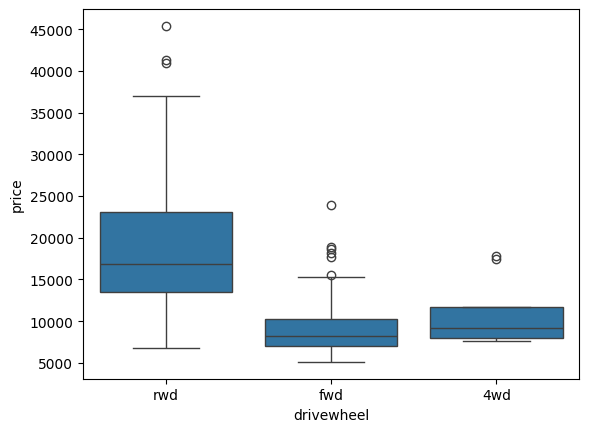

In [ ]:
sns.boxplot(x="drivewheel", y="price", data=dataTrain)

<Axes: xlabel='enginelocation', ylabel='price'>

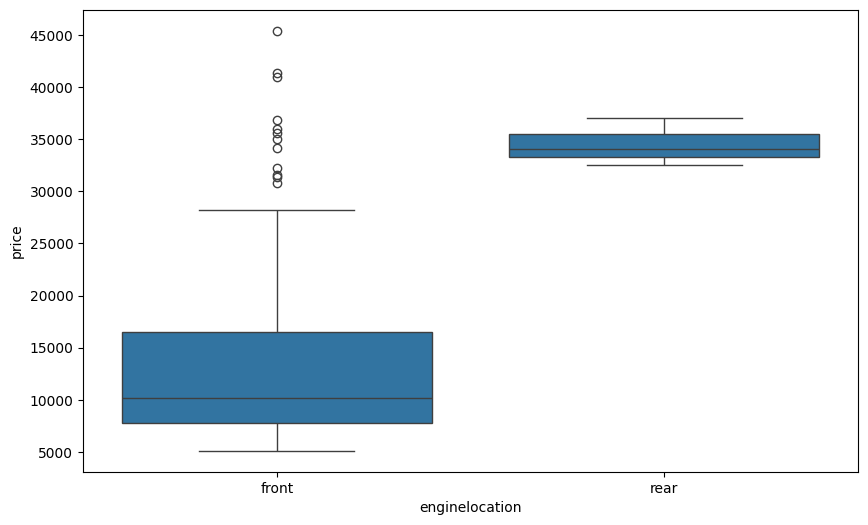

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="enginelocation", y="price", data=dataTrain)

<Axes: xlabel='enginetype', ylabel='price'>

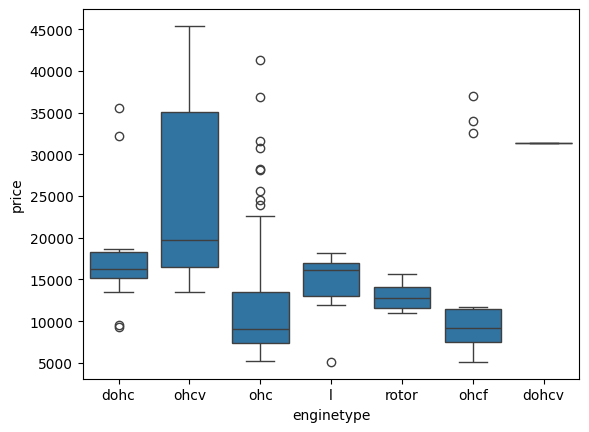

In [ ]:
sns.boxplot(x="enginetype", y="price", data=dataTrain)

<Axes: xlabel='cylindernumber', ylabel='price'>

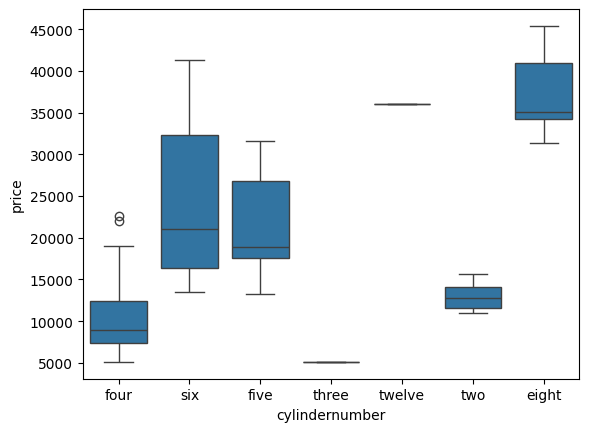

In [ ]:
sns.boxplot(x="cylindernumber", y="price", data=dataTrain)

In [ ]:
dataTrain.drop(['symboling', 'wheelbase', 'carlength','carwidth'], axis = 1, inplace = True)

In [ ]:
dataTrain.drop(['CarName', 'fueltype', 'carbody','drivewheel'], axis = 1, inplace = True)

In [ ]:
dataTrain.shape


(205, 11)

In [ ]:
dataTest.shape

(205, 19)

In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
dataTrain.CarName = labelencoder.fit_transform(dataTrain.CarName)
dataTrain.fueltype = labelencoder.fit_transform(dataTrain.fueltype)
dataTrain.carbody = labelencoder.fit_transform(dataTrain.carbody)
dataTrain.drivewheel = labelencoder.fit_transform(dataTrain.drivewheel)

dataTrain.wheelbase = labelencoder.fit_transform(dataTrain.wheelbase)
dataTrain.stroke = labelencoder.fit_transform(dataTrain.stroke)
dataTrain.enginesize = labelencoder.fit_transform(dataTrain.enginesize)
dataTrain.boreratio = labelencoder.fit_transform(dataTrain.boreratio)
dataTrain.enginelocation = labelencoder.fit_transform(dataTrain.enginelocation)
dataTrain.cylindernumber = labelencoder.fit_transform(dataTrain.cylindernumber)
dataTrain.enginetype = labelencoder.fit_transform(dataTrain.enginetype)

In [ ]:
dataTrain.head(10)

,symboling,CarName,fueltype,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,price
0,3,2,1,0,2,0,2,168.8,64.1,48.8,2548,0,2,18,23,4,9.0,111,13495.000
1,3,3,1,0,2,0,2,168.8,64.1,48.8,2548,0,2,18,23,4,9.0,111,16500.000
2,1,1,1,2,2,0,10,171.2,65.5,52.4,2823,5,3,28,1,28,9.0,154,16500.000
3,2,4,1,3,1,0,30,176.6,66.2,54.3,2337,3,2,11,13,25,10.0,102,13950.000
4,2,5,1,3,0,0,28,176.6,66.4,54.3,2824,3,1,22,13,25,8.0,115,17450.000
5,2,9,1,3,1,0,30,177.3,66.3,53.1,2507,3,1,22,13,25,8.5,110,15250.000
6,1,5,1,3,1,0,42,192.7,71.4,55.7,2844,3,1,22,13,25,8.5,110,17710.000
7,1,7,1,4,1,0,42,192.7,71.4,55.7,2954,3,1,22,13,25,8.5,110,18920.000
8,1,6,1,3,1,0,42,192.7,71.4,55.9,3086,3,1,19,10,25,8.3,140,23875.000
9,0,8,1,2,0,0,29,178.2,67.9,52.0,3053,3,1,19,10,25,7.0,160,17859.167


In [ ]:
dataTest.head(10)

,symboling,CarName,fueltype,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,price
0,3,alfa-romero giulia,gas,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,13495.000
1,3,alfa-romero stelvio,gas,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,16500.000
2,1,alfa-romero Quadrifoglio,gas,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,2.68,3.47,9.0,154,16500.000
3,2,audi 100 ls,gas,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,3.19,3.40,10.0,102,13950.000
4,2,audi 100ls,gas,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,3.19,3.40,8.0,115,17450.000
5,2,audi fox,gas,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,3.19,3.40,8.5,110,15250.000
6,1,audi 100ls,gas,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,3.19,3.40,8.5,110,17710.000
7,1,audi 5000,gas,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,3.19,3.40,8.5,110,18920.000
8,1,audi 4000,gas,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,3.13,3.40,8.3,140,23875.000
9,0,audi 5000s (diesel),gas,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,3.13,3.40,7.0,160,17859.167


In [ ]:
# Calculate the z-score from with scipy
import scipy.stats as stats
dataTrain = stats.zscore(dataTrain)
#dataTest = stats.zscore(dataTest)

In [ ]:
dataTrain

,symboling,CarName,fueltype,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,price
0,3,2,gas,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,13495.0
1,3,3,gas,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,16500.0
2,1,1,gas,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,2.68,3.47,9.0,154,16500.0
3,2,4,gas,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,3.19,3.40,10.0,102,13950.0
4,2,5,gas,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,3.19,3.40,8.0,115,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,139,gas,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,3.78,3.15,9.5,114,16845.0
201,-1,138,gas,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,3.78,3.15,8.7,160,19045.0
202,-1,140,gas,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,3.58,2.87,8.8,134,21485.0
203,-1,142,diesel,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,3.01,3.40,23.0,106,22470.0


In [ ]:
dataTest

,symboling,CarName,fueltype,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,price
0,3,alfa-romero giulia,gas,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,13495.0
1,3,alfa-romero stelvio,gas,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,16500.0
2,1,alfa-romero Quadrifoglio,gas,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,2.68,3.47,9.0,154,16500.0
3,2,audi 100 ls,gas,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,3.19,3.40,10.0,102,13950.0
4,2,audi 100ls,gas,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,3.19,3.40,8.0,115,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,3.78,3.15,9.5,114,16845.0
201,-1,volvo 144ea,gas,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,3.78,3.15,8.7,160,19045.0
202,-1,volvo 244dl,gas,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,3.58,2.87,8.8,134,21485.0
203,-1,volvo 246,diesel,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,3.01,3.40,23.0,106,22470.0


In [ ]:
x_train=dataTrain.iloc[:,0:17]
y_train=dataTrain.iloc[:,18]






In [ ]:
#In case you have no separate testing data, use the following code
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.3, random_state = 0)
#30% of the trainng data will be used for testing


In [ ]:
x_train.head()

,symboling,CarName,fueltype,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,boreratio,stroke,compressionratio
40,-0.671472,-1.007218,0.328798,0.449677,-0.589081,-0.121867,-0.326583,0.109752,-1.592458,0.153893,-0.353413,-0.013908,-0.147475,-0.428554,-0.695096,1.360863,-0.288349
60,-0.671472,-0.493952,0.328798,0.449677,-0.589081,-0.121867,0.175718,0.304760,0.276731,0.728239,-0.280253,-0.013908,-0.147475,0.033347,0.208039,0.470274,-0.389299
56,1.743470,-0.567276,0.328798,-0.717207,1.213330,-0.121867,-0.757127,-0.410271,-0.097107,-1.692220,-0.338011,2.837289,4.891266,-1.444736,-0.093006,0.024980,-0.187398
101,-0.671472,-0.151774,0.328798,0.449677,-0.589081,-0.121867,0.606262,0.621649,0.276731,0.564140,1.038554,1.886890,1.112210,1.603810,0.308388,0.136304,-0.288349
86,0.133509,-0.200657,0.328798,0.449677,-0.589081,-0.121867,-0.398340,-0.134009,-0.237296,-0.871725,-0.289879,-0.013908,-0.147475,0.033347,0.107691,0.804245,-0.414537


In [ ]:
y_train.head()

40    -0.374148
60    -0.600013
56    -0.179652
101    0.027893
86    -0.638410
Name: price, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model_mlr = model.fit(x_train,y_train)

In [ ]:
y_pred1 = model_mlr.predict(x_test)


In [ ]:
#randomly checking the y-test values
y_test.iloc[0]

-0.8133305542770792

In [ ]:
#randomly checking the y-pred values
y_pred1[0]

-0.8737707235166409

In [ ]:
mse1 = mean_squared_error(y_test, y_pred1)
print('The mean square error for Multiple Linear Regression: ', mse1)

The mean square error for Multiple Linear Regression:  0.21150685984024636


In [ ]:
mae1= mean_absolute_error(y_test, y_pred1)
print('The mean absolute error for Multiple Linear Regression: ', mae1)

The mean absolute error for Multiple Linear Regression:  0.30299572406739667


In [ ]:
x_train.head()

,symboling,CarName,fueltype,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,boreratio,stroke,compressionratio
40,-0.671472,-1.007218,0.328798,0.449677,-0.589081,-0.121867,-0.326583,0.109752,-1.592458,0.153893,-0.353413,-0.013908,-0.147475,-0.428554,-0.695096,1.360863,-0.288349
60,-0.671472,-0.493952,0.328798,0.449677,-0.589081,-0.121867,0.175718,0.304760,0.276731,0.728239,-0.280253,-0.013908,-0.147475,0.033347,0.208039,0.470274,-0.389299
56,1.743470,-0.567276,0.328798,-0.717207,1.213330,-0.121867,-0.757127,-0.410271,-0.097107,-1.692220,-0.338011,2.837289,4.891266,-1.444736,-0.093006,0.024980,-0.187398
101,-0.671472,-0.151774,0.328798,0.449677,-0.589081,-0.121867,0.606262,0.621649,0.276731,0.564140,1.038554,1.886890,1.112210,1.603810,0.308388,0.136304,-0.288349
86,0.133509,-0.200657,0.328798,0.449677,-0.589081,-0.121867,-0.398340,-0.134009,-0.237296,-0.871725,-0.289879,-0.013908,-0.147475,0.033347,0.107691,0.804245,-0.414537


In [ ]:
rf = RandomForestRegressor()
model_rf = rf.fit(x_train,y_train)

In [ ]:
y_pred2 = model_rf.predict(x_test)

In [ ]:
mae2= mean_absolute_error(y_test, y_pred2)
print('The mean absolute error of price and predicted value is: ', mae2)

The mean absolute error of price and predicted value is:  0.20589598164714812


In [ ]:
#LASSO Model
#Calling the model and fitting the training data
from sklearn.linear_model import LinearRegression,Lasso
LassoModel = Lasso()
model_lm = LassoModel.fit(x_train,y_train)

In [ ]:
#Price prediction uisng testing data
y_pred3 = model_lm.predict(x_test)


In [ ]:
mae3= mean_absolute_error(y_test, y_pred3)
print('The mean absolute error of price and predicted value is: ', mae3)

The mean absolute error of price and predicted value is:  0.7435800329998519


In [ ]:
#Mean Squared Error for the LASSO Model
mse3 = mean_squared_error(y_test, y_pred3)
print('The mean square error of price and predicted value is: ', mse3)

The mean square error of price and predicted value is:  1.039878521979853


In [ ]:
scores = [('MLR', mae1),
          ('Random Forest', mae2),
          ('LASSO', mae3)
         ]

In [ ]:
mae = pd.DataFrame(data = scores, columns=['Model', 'MAE Score'])
mae

,Model,MAE Score
0,MLR,0.302996
1,Random Forest,0.205896
2,LASSO,0.743580


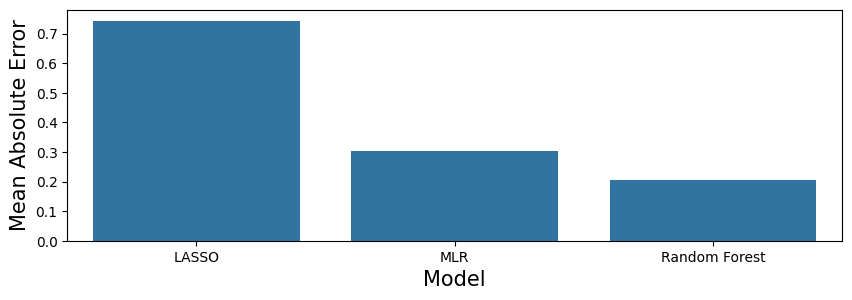

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
mae.sort_values(by=(['MAE Score']), ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(10,3))
sns.barplot(x = mae['Model'], y=mae['MAE Score'], ax = axe)
axe.set_xlabel('Model', size=15)
axe.set_ylabel('Mean Absolute Error', size=15)

plt.show()